# Supervised Learning Model Evaluation Metrics

How do we evaluate the performance of a machine learning model? There are many different metrics that can be used, depending on the type of problem and the goals of the model. The choice of metric will almost always depend heavily on the type of problem you are trying to solve.

But how do we apply these metrics? We can split our data into a training set and a test set. We train our model on the training set and then evaluate its performance on the test set. If we're tuning hyperparameters, we might use a validation set as well.

![train_test](img/tr_ts.png)

Even better than a single train/test split is to use *cross-validation*. In cross-validation, the data is split into K folds, and the model is trained and evaluated K times, each time using a different fold as the test set. This gives us a more robust estimate of the model's performance.

![cross_val](img/cvl.png)

### 1. Regression Metrics

In a regression problem, we are trying to predict a continuous value. Some common metrics for evaluating regression models include:
* Mean Squared Error (MSE) - the average of the squared differences between the predicted and actual values
* Root Mean Squared Error (RMSE) - the square root of the MSE. More interpretable than MSE due to being in the same units as the target variable
* Mean Absolute Error (MAE) - the average of the absolute differences between the predicted and actual values
* R-squared (R2) - a measure of how much of the variation in the target is captured by your model

#### Mean Squared Error (MSE)

Mean Squared Error (MSE) is a metric used to measure the average squared difference between actual values and predicted values. It is commonly used in regression tasks to quantify the accuracy of a predictive model. Mathematically, MSE is defined as:

$$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $$

where $ n $ is the number of data points, $ y_i $ represents the actual value of the $ i $-th data point, and $ \hat{y}_i $ is the predicted value of the $ i $-th data point.

For example, suppose a model predicts housing prices for four houses as $ \hat{y} = [250k, 300k, 200k, 400k] $, while the actual prices are $ y = [260k, 310k, 190k, 390k] $. The MSE would be calculated as:

$$ \text{MSE} = \frac{1}{4} \left( (260k - 250k)^2 + (310k - 300k)^2 + (190k - 200k)^2 + (390k - 400k)^2 \right) $$

This results in:

$$ \text{MSE} = \frac{1}{4} \left( 10k^2 + 10k^2 + (-10)^2 + (-10)^2 \right) = 100M $$

Thus, the MSE for this prediction is 100M, meaning that, on average, the squared error between predicted and actual housing prices is 100M. Notice this is *not* on the scale of dollars, it is on the scale of dollars *squared*.



In [1]:
from utils import create_answer_box

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Load the California Housing dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display metrics
print("Regression Metrics for California Housing Dataset:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")

# Display feature names and their coefficients
feature_names = housing.feature_names
coefficients = model.coef_

print("\nFeature Coefficients:")
for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef:.4f}")

Regression Metrics for California Housing Dataset:
Mean Squared Error (MSE): 0.5559
Root Mean Squared Error (RMSE): 0.7456
Mean Absolute Error (MAE): 0.5332
R-squared (R2): 0.5758

Feature Coefficients:
MedInc: 0.4487
HouseAge: 0.0097
AveRooms: -0.1233
AveBedrms: 0.7831
Population: -0.0000
AveOccup: -0.0035
Latitude: -0.4198
Longitude: -0.4337


In [4]:
create_answer_box("Try varying the size of the test set above and re-running the code a few times. What effect does that test set size appear to have on the model's performance in this case?", "04-03")

Try varying the size of the test set above and re-running the code a few times. What effect does that test set size appear to have on the model's performance in this case?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

In [6]:
create_answer_box("In general, people tend to use test set sizes between 0.1 and 0.3. But that's still a wide range. What considerations do you think might help determine what an appropriate test set size is in a particular case?", "04-04")

In general, people tend to use test set sizes between 0.1 and 0.3. But that's still a wide range. What considerations do you think might help determine what an appropriate test set size is in a particular case?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

In [7]:
create_answer_box("Do you think, compared with some baseline model, a second model could simultaneously be better on some metric and worse on another? Why or why not?", "04-05")

Do you think, compared with some baseline model, a second model could simultaneously be better on some metric and worse on another? Why or why not?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

### 2. Classification Metrics

In a classification problem, we are trying to predict a label. Some common metrics for evaluating classification models include:
* Accuracy - the proportion of correctly classified instances
* Precision - the proportion of true positive predictions among all positive *predictions*
* Recall - the proportion of true positive predictions among all actual positive *instances*
* F1 Score - the harmonic mean of precision and recall $\left(F_1 = 2 \times \frac{\text{precision} \times \text{recall}}{\text{precision} + \text{recall}}\right)$
* ROC AUC - the area under the Receiver Operating Characteristic curve

<img src="img/prec_rec.png" alt="precision_recall" style="width:30%">

Note that all of the above *except* for ROC AUC depend on your choice of threshold for classification. ROC AUC is a metric that is threshold-independent, and is often used when you want to compare models across different thresholds. 

Let's look at this in action, after fitting a logistic regression model on the UCI Ionosphere dataset. In this dataset, we are trying to predict whether a radar return is "good" or "bad" based on features such as the signal's amplitude and frequency.


Classification Metrics for Ionosphere Dataset:
Accuracy: 0.8585
Precision: 0.8171
Recall: 1.0000
F1 Score: 0.8993
ROC AUC: 0.9097


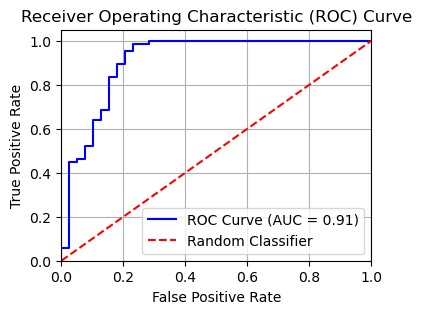

In [5]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Load the Ionosphere dataset
ionosphere = fetch_openml(name="ionosphere", version=1, as_frame=True)
X, y = ionosphere.data, ionosphere.target
y = (y == 'g').astype(int)  # Convert to binary (good=1, bad=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit a logistic regression model with reduced performance
model = LogisticRegression(random_state=42, C=0.01, max_iter=1000) 
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Display metrics
print("Classification Metrics for Ionosphere Dataset:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

The ROC curve shows the true positive rate (i.e., the proportion of actual positive cases correctly identified) against the false positive rate (i.e., the proportion of actual negative cases incorrectly classified as positive) at various classification thresholds. The ROC AUC is just the area under the curve -- the higher, the better.

In [9]:
create_answer_box("Accuracy is usually not considered a good metric when a dataset is highly *imbalanced*, containing many more of one class than of others. Why do you think this is?", "04-06")

Accuracy is usually not considered a good metric when a dataset is highly *imbalanced*, containing many more of one class than of others. Why do you think this is?

Text(value='', layout=Layout(width='500px'), placeholder='Type your answer here')

Button(button_style='success', description='Submit', style=ButtonStyle())

Output()

##### Confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model. It shows the number of true positives, false positives, true negatives, and false negatives. From the confusion matrix, we can calculate many different metrics, including accuracy, precision, recall, and F1 score.

In [ ]:
# Display the confusion matrix as a plot
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(2, 2))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Bad', 'Good'], yticklabels=['Bad', 'Good'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

